In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# 'observation.db' holds both Postgres and MySQL observations.
conn = sqlite3.connect('observation.db')

# These contain the start + end times for both MySQL and Postgres.
log_columns = ['id', 'start_time', 'end_time', 'time_delta', 'workload', 'concurrency', 'mpl', 'iso']
mysql_log = pd.read_csv('mysql-log.csv', names=log_columns)
postgres_log = pd.read_csv('postgres-log.csv', names=log_columns)

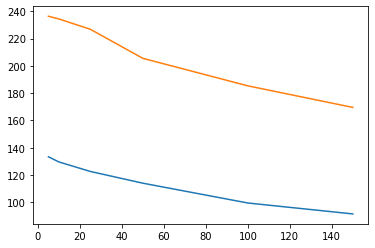

In [9]:
# Response time of INSERT-only workload for Postgres and MySQL as a function of MPL.

mpls = mysql_log.query('workload == "i" and concurrency == "high"')['mpl']
mysql_response_time_low = mysql_log.query('workload == "i" and concurrency == "low"')['time_delta']
mysql_response_time_high = mysql_log.query('workload == "i" and concurrency == "high"')['time_delta']

plt.plot(mpls, mysql_response_time_low)
plt.plot(mpls, mysql_response_time_high)

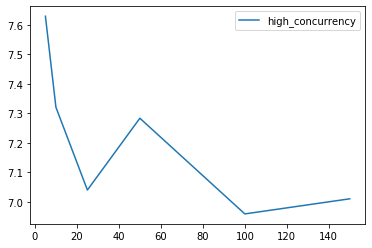

In [16]:
# Response time of QUERY-only workload for Postgres and MySQL as a function of MPL.


mpls = mysql_log.query('workload == "q" and concurrency == "high"')['mpl']
mysql_response_time_low = mysql_log.query('workload == "q" and concurrency == "low"')['time_delta']
mysql_response_time_high = mysql_log.query('workload == "q" and concurrency == "high"')['time_delta']
#postgres_response_time = postgres_log.query('workload == "q" and concurrency == "high"')['time_delta']

#low_concurrency, = plt.plot(mpls, mysql_response_time_low)
high_concurrency, = plt.plot(mpls, mysql_response_time_high)

plt.legend([ high_concurrency],[ "high_concurrency"])
plt.show()



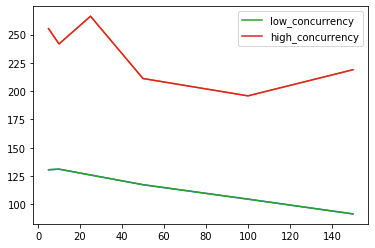

In [21]:
# Response time of complete workload for Postgres and MySQL as a function of MPL.


mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['mpl']
mysql_response_time_low = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rc"')['time_delta']
mysql_response_time_high = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['time_delta']
#postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['time_delta']

plt.plot(mpls, mysql_response_time_low)
plt.plot(mpls, mysql_response_time_high)

low_concurrency, = plt.plot(mpls, mysql_response_time_low)
high_concurrency, = plt.plot(mpls, mysql_response_time_high)

plt.legend([ low_concurrency, high_concurrency],[ "low_concurrency", "high_concurrency"])
#plt.plot(mpls, postgres_response_time)

#mysql_response_time




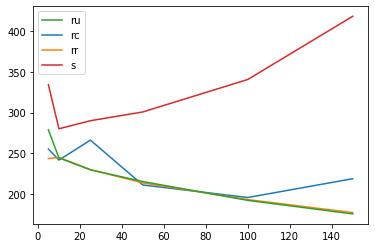

In [22]:
# Response time of complete workload for Postgres and MySQL w/ different isolation levels.

#ru, rr, rc, s

mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['time_delta']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['time_delta']

rc_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rc")
#plt.plot(mpls, postgres_response_time)

mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['time_delta']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['time_delta']

rr_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rr")
#plt.plot(mpls, postgres_response_time)


mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['time_delta']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['time_delta']

ru_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "ru")
#plt.plot(mpls, postgres_response_time)

mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "s"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "s"')['time_delta']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "s"')['time_delta']

rs_plot_mysql, =plt.plot(mpls, mysql_response_time , label = "s")
#plt.plot(mpls, postgres_response_time)

plt.legend([ru_plot_mysql, rc_plot_mysql, rr_plot_mysql, rs_plot_mysql],["ru", "rc", "rr", "s"])
plt.show()

